In [50]:
# Importing all libraries
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [44]:
# Loading the traina and test dataset in dataframe using python
df_train = pd.read_csv("flight_ticket_pricing_train.csv")
df_test = pd.read_csv("flight_ticket_pricing_test_data.csv")

In [45]:
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [46]:
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL ? BOM ? COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? MAA ? BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL ? BOM ? COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR ? DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [47]:
df = df_train.append(df_test,sort=False)

In [48]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
2666,Air India,6/06/2019,Kolkata,Banglore,CCU ? DEL ? BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,NaN
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU ? BLR,14:20,16:55,2h 35m,non-stop,No info,NaN
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,NaN
2669,Air India,6/03/2019,Delhi,Cochin,DEL ? BOM ? COK,04:00,19:15,15h 15m,1 stop,No info,NaN
2670,Multiple carriers,15/06/2019,Delhi,Cochin,DEL ? BOM ? COK,04:55,19:15,14h 20m,1 stop,No info,NaN


In [49]:
# data types
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
dtype: object

In [58]:
# to check for null values
df.isnull().sum()

Airline               0
Date_of_Journey       0
Source                0
Destination           0
Route                 1
Dep_Time              0
Arrival_Time          0
Duration              0
Total_Stops           1
Additional_Info       0
Price              2671
dtype: int64

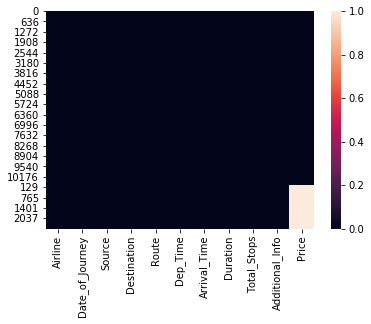

In [59]:
# checking null value using heatmap
sns.heatmap(df.isnull())

 above heatmap confirms the presence of null values in Price column

In [ ]:
# Summary Statistics

In [61]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

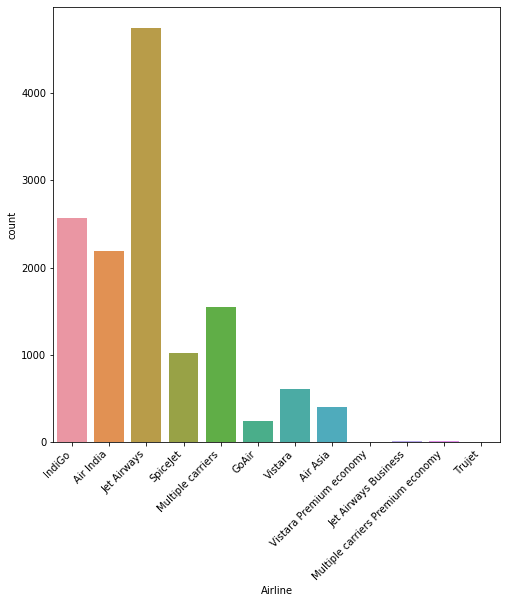

In [57]:
# Analysis of various Airlines
plt.figure(figsize=(8,8))
sns.countplot(df["Airline"])
plt.xticks(rotation=45,ha="right")

Most of the people travelled with Jet Airways followed by Indigo and then Air India

# Feature Engineering

In [8]:
# Extracting months,day,year from Date of Journey  column
df["Date"] = df["Date_of_Journey"].str.split('/').str[0]
df["Month"] = df["Date_of_Journey"].str.split('/').str[1]
df["Year"] = df["Date_of_Journey"].str.split('/').str[2]

In [9]:
# printing here first five rows
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,03,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,05,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,06,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,05,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,01,03,2019


In [10]:
# data types
df.dtypes

Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                object
Month               object
Year                object
dtype: object

In [11]:
# changing the data type of Date, Month and Year columns from object to integer
df['Date']=df['Date'].astype(int)
df['Month']=df['Month'].astype(int)
df['Year']=df['Year'].astype(int)

In [12]:
# checking data types again
df.dtypes


Airline             object
Date_of_Journey     object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
dtype: object

In [13]:
# droping here irrelevant column Date_of_Journey
df = df.drop(['Date_of_Journey'],axis=1)

In [14]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [15]:
# In the column ‘Arrival_Time’, we can see we have combination of both time and month but 
# we need only the time details out of it so we split the time into ‘Hours’ and ‘Minute’

df["Arrival_Time"] = df["Arrival_Time"].str.split(' ').str[0]

In [17]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,non-stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [18]:
df[df["Total_Stops"].isnull()]

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
9039,Air India,Delhi,Cochin,NaN,09:45,09:25,23h 40m,NaN,No info,7480.0,6,5,2019


In [19]:
df["Total_Stops"]=df["Total_Stops"].fillna('1 stop')

In [20]:
df["Total_Stops"]=df["Total_Stops"].replace('non-stop','0 stop')

In [21]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019


In [22]:
df['Stop']=df["Total_Stops"].str.split(' ').str[0]

In [23]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,0 stop,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,2 stops,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,2 stops,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,1 stop,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,1 stop,No info,13302.0,1,3,2019,1


In [24]:
df.dtypes

Airline             object
Source              object
Destination         object
Route               object
Dep_Time            object
Arrival_Time        object
Duration            object
Total_Stops         object
Additional_Info     object
Price              float64
Date                 int32
Month                int32
Year                 int32
Stop                object
dtype: object

In [25]:
df['Stop']=df['Stop'].astype(int)
df = df.drop(['Total_Stops'],axis=1)

In [26]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,01:10,2h 50m,No info,3897.0,24,3,2019,0
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,13:15,7h 25m,No info,7662.0,1,5,2019,2
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,04:25,19h,No info,13882.0,9,6,2019,2
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,23:30,5h 25m,No info,6218.0,12,5,2019,1
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,21:35,4h 45m,No info,13302.0,1,3,2019,1


In [27]:
df['Arrival_Hour']=df['Arrival_Time'].str.split(':').str[0]
df['Arrival_Minute']=df['Arrival_Time'].str.split(':').str[1]

In [28]:
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df['Arrival_Hour']=df['Arrival_Hour'].astype(int)
df = df.drop(['Arrival_Time'],axis=1)

In [29]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,22:20,2h 50m,No info,3897.0,24,3,2019,0,1,10
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,05:50,7h 25m,No info,7662.0,1,5,2019,2,13,15
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,09:25,19h,No info,13882.0,9,6,2019,2,4,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,18:05,5h 25m,No info,6218.0,12,5,2019,1,23,30
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,16:50,4h 45m,No info,13302.0,1,3,2019,1,21,35


In [30]:
df['Departure_Hour']=df['Dep_Time'].str.split(':').str[0]
df['Departure_Minute']=df['Dep_Time'].str.split(':').str[1]

In [31]:
df['Departure_Hour']=df['Departure_Hour'].astype(int)
df['Departure_Minute']=df['Departure_Minute'].astype(int)
df = df.drop(['Dep_Time'],axis=1)

In [32]:
df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50


In [33]:
df['Route_1']= df['Route'].str.split('?').str[0]
df['Route_2']= df['Route'].str.split('?').str[1]
df['Route_3']= df['Route'].str.split('?').str[2]
df['Route_4']= df['Route'].str.split('?').str[3]
df['Route_5']= df['Route'].str.split('?').str[4]

In [34]:
df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,NaN
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,NaN
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,NaN,NaN
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,NaN,NaN


In [35]:
df['Price'].fillna((df['Price'].mean()),inplace=True)

In [36]:
# Replacing null values with None
df['Route_1'].fillna("None",inplace=True)
df['Route_2'].fillna("None",inplace=True)
df['Route_3'].fillna("None",inplace=True)
df['Route_4'].fillna("None",inplace=True)
df['Route_5'].fillna("None",inplace=True)

In [37]:
df.head()

,Airline,Source,Destination,Route,Duration,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,BLR ? DEL,2h 50m,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,CCU ? IXR ? BBI ? BLR,7h 25m,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,DEL ? LKO ? BOM ? COK,19h,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,CCU ? NAG ? BLR,5h 25m,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,BLR ? NAG ? DEL,4h 45m,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [38]:
df = df.drop(columns=["Route","Duration"])

In [39]:
df.head()

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,IndiGo,Banglore,New Delhi,No info,3897.0,24,3,2019,0,1,10,22,20,BLR,DEL,None,None,None
1,Air India,Kolkata,Banglore,No info,7662.0,1,5,2019,2,13,15,5,50,CCU,IXR,BBI,BLR,None
2,Jet Airways,Delhi,Cochin,No info,13882.0,9,6,2019,2,4,25,9,25,DEL,LKO,BOM,COK,None
3,IndiGo,Kolkata,Banglore,No info,6218.0,12,5,2019,1,23,30,18,5,CCU,NAG,BLR,None,None
4,IndiGo,Banglore,New Delhi,No info,13302.0,1,3,2019,1,21,35,16,50,BLR,NAG,DEL,None,None


In [40]:
df.isnull().sum()

Airline             0
Source              0
Destination         0
Additional_Info     0
Price               0
Date                0
Month               0
Year                0
Stop                0
Arrival_Hour        0
Arrival_Minute      0
Departure_Hour      0
Departure_Minute    0
Route_1             0
Route_2             0
Route_3             0
Route_4             0
Route_5             0
dtype: int64

In [41]:
# Using LabelEncoder converting the labels into numeric form so as to convert it into the machine-readable form.
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

for column in df.columns:
    if df[column].dtype == object:
        df[column]=le.fit_transform(df[column])

In [42]:
df

,Airline,Source,Destination,Additional_Info,Price,Date,Month,Year,Stop,Arrival_Hour,Arrival_Minute,Departure_Hour,Departure_Minute,Route_1,Route_2,Route_3,Route_4,Route_5
0,3,0,5,8,3897.000000,24,3,2019,0,1,2,22,20,0,13,30,13,5
1,1,3,0,8,7662.000000,1,5,2019,2,13,3,5,50,2,25,1,3,5
2,4,2,1,8,13882.000000,9,6,2019,2,4,5,9,25,3,32,4,5,5
3,3,3,0,8,6218.000000,12,5,2019,1,23,6,18,5,2,34,3,13,5
4,3,0,5,8,13302.000000,1,3,2019,1,21,7,16,50,0,34,8,13,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,1,3,0,8,9087.064121,6,6,2019,1,20,5,20,30,2,14,3,13,5
2667,3,3,0,8,9087.064121,27,3,2019,0,16,11,14,20,2,5,30,13,5
2668,4,2,1,8,9087.064121,6,3,2019,1,4,5,21,50,3,7,6,13,5
2669,1,2,1,8,9087.064121,6,3,2019,1,19,3,4,0,3,7,6,13,5


# Feature Selection

In [170]:
from sklearn.model_selection import train_test_split

In [172]:
df_train = df[0:10683]
df_test = df[10683:]

In [173]:
x = df_train.drop(["Price"],axis=1)
y = df_train["Price"]

In [178]:
#scaling the input variables
scale =StandardScaler()
x=scale.fit_transform(x)
x=pd.DataFrame(data=x)

In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=48,test_size=0.20)

In [180]:
# defining a common function here for all Regression model and there by finding the best random state having highest r2 score
regr  = LinearRegression()
def maxr2_score(regr,x,y):
    max_r_score=0
    for r_state in range(42,100):
        x_train,x_test,y_train,y_test = train_test_split(x,y,random_state=r_state,test_size=0.20)
        regr.fit(x_train,y_train)
        y_pred = regr.predict(x_test)
        r2_scr = r2_score(y_test,y_pred)
        print("r2 score corresponding to",r_state,"is",r2_scr)
        if r2_scr>max_r_score:
            max_r_score=r2_scr
            final_r_state=r_state
    print("max r2 score corresponding to",final_r_state,"is",max_r_score)
    return final_r_state

In [181]:
# Using LinearRegression
lreg=LinearRegression()
r_state=maxr2_score(lreg,x,y)

r2 score corresponding to 42 is 0.48943790827953093
r2 score corresponding to 43 is 0.474054264232033
r2 score corresponding to 44 is 0.48037223944468166
r2 score corresponding to 45 is 0.44644343690732213
r2 score corresponding to 46 is 0.4935242419576755
r2 score corresponding to 47 is 0.5071059358959529
r2 score corresponding to 48 is 0.45991635496090344
r2 score corresponding to 49 is 0.5249127976515502
r2 score corresponding to 50 is 0.5060772490227898
r2 score corresponding to 51 is 0.49701847561416046
r2 score corresponding to 52 is 0.5096188605492794
r2 score corresponding to 53 is 0.4577760966013448
r2 score corresponding to 54 is 0.5163784040447277
r2 score corresponding to 55 is 0.4873692562631282
r2 score corresponding to 56 is 0.45749263730834466
r2 score corresponding to 57 is 0.4789680797475335
r2 score corresponding to 58 is 0.4758027355952461
r2 score corresponding to 59 is 0.5049652593580705
r2 score corresponding to 60 is 0.5022231871662243
r2 score corresponding to 

In [182]:
## Using GridSearchCV to find out the best parameters of the KNeighborsRegressor model
neighbors = {"n_neighbors":range(1,30)}
knr=KNeighborsRegressor()
gknr = GridSearchCV(knr,neighbors,cv=10)
gknr.fit(x,y)
gknr.best_params_

{'n_neighbors': 2}

In [183]:
# Using the best parameter obtained above finding out the best random sate of KNeighborsRegressor having highest r2 score
knr=KNeighborsRegressor(n_neighbors=2)
r_state=maxr2_score(knr,x,y)

r2 score corresponding to 42 is 0.707409533268073
r2 score corresponding to 43 is 0.7811134150188068
r2 score corresponding to 44 is 0.7386574224189035
r2 score corresponding to 45 is 0.7082164020144399
r2 score corresponding to 46 is 0.7742598845358702
r2 score corresponding to 47 is 0.7794547114412199
r2 score corresponding to 48 is 0.7342269786909295
r2 score corresponding to 49 is 0.7721145284388813
r2 score corresponding to 50 is 0.774682095830544
r2 score corresponding to 51 is 0.7817589283710779
r2 score corresponding to 52 is 0.775722522432996
r2 score corresponding to 53 is 0.7464817827520185
r2 score corresponding to 54 is 0.742422054348765
r2 score corresponding to 55 is 0.7287884483024708
r2 score corresponding to 56 is 0.7255053256712947
r2 score corresponding to 57 is 0.7883908859839392
r2 score corresponding to 58 is 0.6487696935458716
r2 score corresponding to 59 is 0.7561425039345175
r2 score corresponding to 60 is 0.771773675295816
r2 score corresponding to 61 is 0.74

In [184]:
# Lets chaeck the mean r2 score of both Linear regression model and knn  regression
print("Mean r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Linear Regression: ",cross_val_score(lreg,x,y,cv=5,scoring="r2").std())
print()
print("Mean r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for KNN Regression: ",cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear Regression:  0.49247340802861006
standard deviation in r2 score for Linear Regression:  0.009464153425266165

Mean r2 score for KNN Regression:  0.785391700908402
standard deviation in r2 score for KNN Regression:  0.025877127679415746


In [185]:
## Using GridSearchCV to find out the best parameters of the Support vector regressor model
from sklearn.svm import SVR
parameters={"kernel":["linear","rbf","poly"],"C":[1,10]}
svr = SVR()
clf=GridSearchCV(svr,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'C': 10, 'kernel': 'linear'}

In [186]:
# Using the best parameter obtained above finding out the best random sate of Support vector regressor model
# having highest r2 score
svr=SVR(kernel="linear",C=10)
r_state=maxr2_score(svr,x,y)

r2 score corresponding to 42 is 0.4472784557775634
r2 score corresponding to 43 is 0.44516793568407065
r2 score corresponding to 44 is 0.44396731257395994
r2 score corresponding to 45 is 0.4161472233480964
r2 score corresponding to 46 is 0.4572395109971855
r2 score corresponding to 47 is 0.478095585231748
r2 score corresponding to 48 is 0.4179265219480359
r2 score corresponding to 49 is 0.4919132749516173
r2 score corresponding to 50 is 0.47314190936545564
r2 score corresponding to 51 is 0.4793743679875313
r2 score corresponding to 52 is 0.48784452798029543
r2 score corresponding to 53 is 0.42938075661199415
r2 score corresponding to 54 is 0.4956627259428983
r2 score corresponding to 55 is 0.45115684460763683
r2 score corresponding to 56 is 0.42292311789959025
r2 score corresponding to 57 is 0.4527077627881051
r2 score corresponding to 58 is 0.43351555962704336
r2 score corresponding to 59 is 0.4727334279375349
r2 score corresponding to 60 is 0.4633692884042935
r2 score corresponding t

In [187]:
#Lets check Lasso regression and find best value of alpha
lsreg=Lasso()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(lsreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [188]:
#Lets check max r2 score when we use Lasso
lsreg=Lasso(alpha=1)
r_state=maxr2_score(lsreg,x,y)

r2 score corresponding to 42 is 0.4894294738944315
r2 score corresponding to 43 is 0.47412203870157366
r2 score corresponding to 44 is 0.48043481634940655
r2 score corresponding to 45 is 0.4464537332832229
r2 score corresponding to 46 is 0.4935697781031666
r2 score corresponding to 47 is 0.5070995566915246
r2 score corresponding to 48 is 0.4598866052006806
r2 score corresponding to 49 is 0.5249480738142338
r2 score corresponding to 50 is 0.5061104721570093
r2 score corresponding to 51 is 0.4970928979164393
r2 score corresponding to 52 is 0.5096456888135756
r2 score corresponding to 53 is 0.45784384063391115
r2 score corresponding to 54 is 0.5164797290233527
r2 score corresponding to 55 is 0.48732744174759035
r2 score corresponding to 56 is 0.45751749909679196
r2 score corresponding to 57 is 0.478999121754472
r2 score corresponding to 58 is 0.4757845450105791
r2 score corresponding to 59 is 0.505016264710933
r2 score corresponding to 60 is 0.5021703906677155
r2 score corresponding to 61

In [189]:
print("Mean r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").mean())
print("standard deviation in r2 score for Lasso Regression: ",cross_val_score(lsreg,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso Regression:  0.49249608710305176
standard deviation in r2 score for Lasso Regression:  0.009394107108834012


In [190]:
#Lets check Ridge regression and find best value of alpha
rdreg =Ridge()
parameters={"alpha":[0.001,0.01,0.1,1]}
clf = GridSearchCV(rdreg,parameters,cv=10)
clf.fit(x,y)
clf.best_params_

{'alpha': 1}

In [191]:
#Lets check max r2 score when we use Ridge with best paramtere value =1 obtained using GridSearchCV
rdreg=Ridge(alpha=1)
r_state=maxr2_score(rdreg,x,y)

r2 score corresponding to 42 is 0.4894361225631314
r2 score corresponding to 43 is 0.4740612076604389
r2 score corresponding to 44 is 0.48037437521865745
r2 score corresponding to 45 is 0.44643548975049996
r2 score corresponding to 46 is 0.4935239357477452
r2 score corresponding to 47 is 0.5071105067836286
r2 score corresponding to 48 is 0.45991720539340664
r2 score corresponding to 49 is 0.5249206187752786
r2 score corresponding to 50 is 0.5060843555953054
r2 score corresponding to 51 is 0.4970240767406494
r2 score corresponding to 52 is 0.509623075664654
r2 score corresponding to 53 is 0.45777571607492906
r2 score corresponding to 54 is 0.5163815191589198
r2 score corresponding to 55 is 0.4873592569307743
r2 score corresponding to 56 is 0.45749880756181593
r2 score corresponding to 57 is 0.47897223227149976
r2 score corresponding to 58 is 0.4757962395472354
r2 score corresponding to 59 is 0.5049756512888497
r2 score corresponding to 60 is 0.5022189343209351
r2 score corresponding to 

In [192]:
# to check whether our result gets boosted or not
from sklearn.ensemble import RandomForestRegressor

In [204]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop =1200, num =12)]
max_features = ['auto','sqrt']
max_depth = [int(x) for x in np.linspace(5,30,num=6)]
min_samples_split = [2,5,10,15,100]
min_samples_leaf = [1,2,5,10]

In [205]:
rf_grid={'n_estimators':n_estimators,'max_features':max_features,'max_depth':max_depth,
         'min_samples_split':min_samples_split,'min_samples_leaf':min_samples_leaf}

In [206]:
rf =RandomForestRegressor()

In [212]:
rf_best_tree=RandomizedSearchCV(estimator=rf,param_distributions=rf_grid,n_jobs=-1,cv=3,scoring='r2')

In [213]:
rf_best_tree.fit(x_train,y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [215]:
y_pred=rf_best_tree.predict(x_test)

In [216]:
rfscore=rf_best_tree.score(x_train,y_train)
print(rfscore*100)

96.53118945933461


In [217]:
print("RMSE is:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2_score is:",r2_score(y_test,y_pred))

RMSE is: 1408.4841569547152
r2_score is: 0.9062639008599238


In [ ]:
*RandomForestRegressor has outperformed LinearRegression ,KNeighborsRegressor,SVR,Lasso,Ridge
 with r2_score of 90.62 appx.

In [218]:
from sklearn.externals import joblib

In [220]:
#Save the model as a pickle in a file
joblib.dump(rf_best_tree,"rfflight.pkl")

['rfflight.pkl']

In [221]:
model=joblib.load("rfflight.pkl")

In [222]:
model.predict(x_test)

array([10827.16705357,  6056.81628743, 14794.24299603, ...,
        6838.13306623,  4894.6026768 , 14028.22671002])

In [223]:
print(y_test)

6076     10844.0
3544      4959.0
7313     14781.0
5032      3858.0
2483     12898.0
          ...   
9797      7408.0
9871      4622.0
10063     7452.0
7623      4823.0
8618     13731.0
Name: Price, Length: 2137, dtype: float64
